Importing Libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Importing The Dataset

In [86]:
df = pd.read_csv("co2_emissions_from_agri.csv")
print(df.head())

          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...       

In [87]:
#Checking The Information Of The Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [88]:
#Checking The Column names
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [89]:
#Checking For Duplicates In the Dataset, If Found Drop
df.duplicated().sum()

0

There are 0 duplicates in the dataset

In [91]:
#Checking For NaN Values, Removing Them If They Exist
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


Missing values are present in the Savanna fires, Crop Residues, Rice Cultivation, Forestland, Net Forest conversion, Food Household Consumption, IPPU, 
Manure applied to Solids, Manure Management, Fires in humid tropical forests and On-farm energy use columns

In [93]:
df.dropna(inplace=True)
df.isna().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

There are no missing Values

In [95]:
#Checking The Information Of The Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 31 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             4546 non-null   object 
 1   Year                             4546 non-null   int64  
 2   Savanna fires                    4546 non-null   float64
 3   Forest fires                     4546 non-null   float64
 4   Crop Residues                    4546 non-null   float64
 5   Rice Cultivation                 4546 non-null   float64
 6   Drained organic soils (CO2)      4546 non-null   float64
 7   Pesticides Manufacturing         4546 non-null   float64
 8   Food Transport                   4546 non-null   float64
 9   Forestland                       4546 non-null   float64
 10  Net Forest conversion            4546 non-null   float64
 11  Food Household Consumption       4546 non-null   float64
 12  Food Retail             

Performing EDA

In [97]:
print(df.describe())

              Year  Savanna fires  Forest fires  Crop Residues  \
count  4546.000000    4546.000000   4546.000000    4546.000000   
mean   2005.298724    1578.318742   1154.424220    1202.174505   
std       8.859797    6188.105460   3788.977297    4069.987071   
min    1990.000000       0.000000      0.000000       0.004500   
25%    1998.000000       0.334500      0.048400      23.357000   
50%    2005.000000      11.354550      7.592600     132.518200   
75%    2013.000000     329.383700    222.426075     513.156025   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       4546.000000                  4546.000000   
mean        5601.932066                  5274.474704   
std        21612.516836                 19388.814454   
min            0.000000                     0.000000   
25%           90.361875                     0.000000   
50%          268.512150                   149.762750   
75%         1

In [98]:
#Set The Style
sns.set_theme(style="whitegrid")

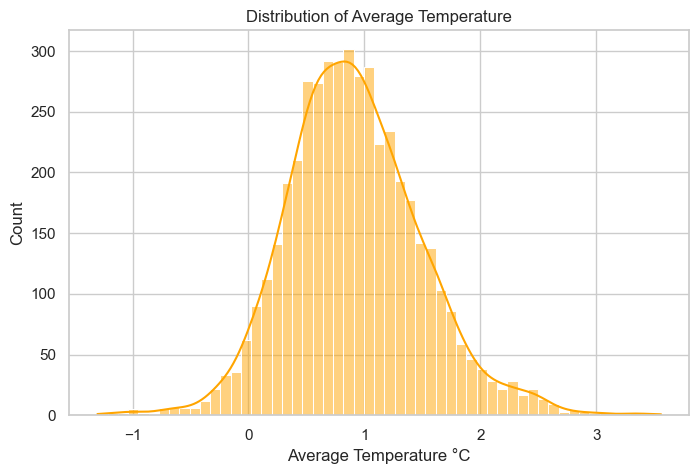

In [99]:
#Histogram of Average Temperature
plt.figure(figsize=(8,5))
sns.histplot(df["Average Temperature °C"], kde=True, color="orange")
plt.title("Distribution of Average Temperature")
plt.show()

The Temperature is Uniformly distributed

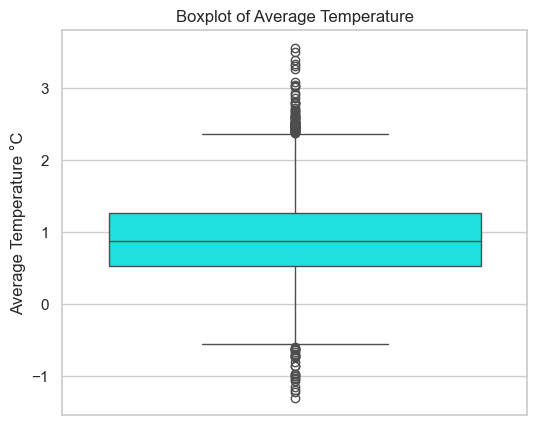

In [101]:
# Boxplot of Average Temperature
plt.figure(figsize=(6,5))
sns.boxplot(y=df["Average Temperature °C"], color="cyan")
plt.title("Boxplot of Average Temperature")
plt.show()

Most average temperatures are between ~0.6°C and 1.2°C, but there are quite a few unusual readings, both hot and cold, that fall well outside the typical range. This suggests that while the climate is relatively stable most of the time, there are occasional extreme events. This might be caused by Extreme weather events, seasonal changes or measurement errors.

In [103]:
# Detect outliers using IQR method
temp = 'Average Temperature °C'
Q1 = df[temp].quantile(0.25)
Q3 = df[temp].quantile(0.75)
IQR = Q3 - Q1
#Define lower and upper bounds for normal range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['IQR_outlier'] = ((df[temp] < lower_bound) | (df[temp] > upper_bound))
print(lower_bound)
print(upper_bound)

-0.5756458333333335
2.3646875000000005


This means that temperatures below -0.58 are outliers or what we'd like to call extremes and temperatures above 2.36 are also extremes(heatwave)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


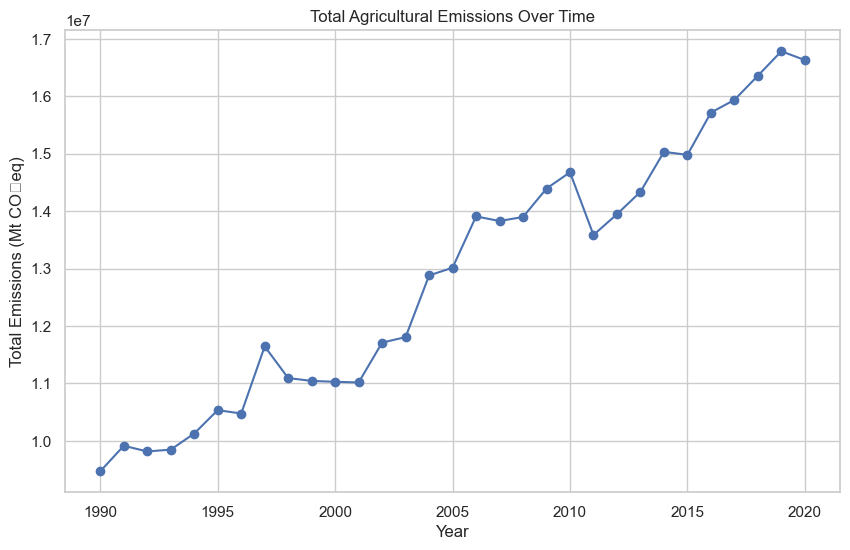

In [105]:
# 1. Total emissions over time
plt.figure(figsize=(10,6))
df.groupby("Year")["total_emission"].sum().plot(marker='o')
plt.title("Total Agricultural Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions (Mt CO₂eq)")
plt.grid(True)
plt.show()

- Agricultural CO₂ emissions have risen steadily from 1990 to 2020.
- The upward trend shows growing environmental pressure from the agri-food sector.
- This suggests that agricultural practices are contributing increasingly to greenhouse gas levels.

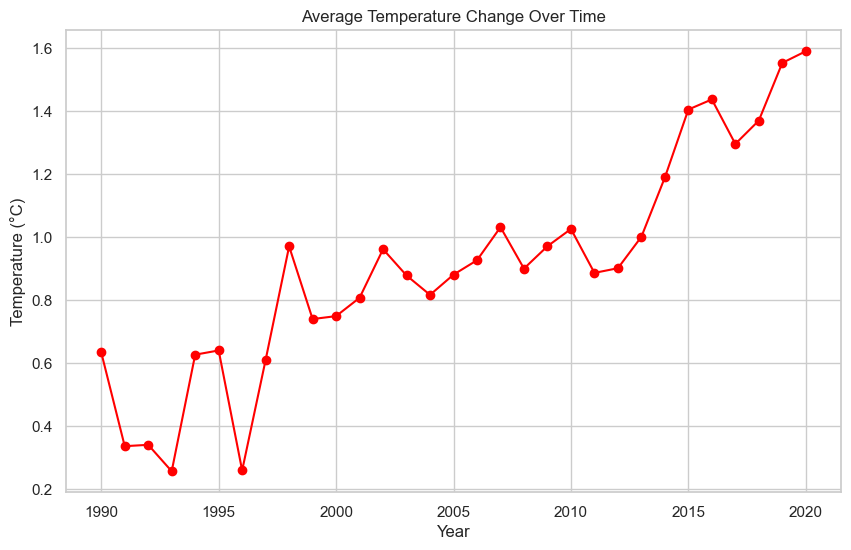

In [107]:
# 2. Average temperature change over time
plt.figure(figsize=(10,6))
df.groupby("Year")["Average Temperature °C"].mean().plot(marker='o', color='red')
plt.title("Average Temperature Change Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

- Global average temperatures have gradually increased over the same period.
- The rise aligns with growing emissions, indicating possible climate impact.
- Occasional dips occur, but the overall trend is clearly upward.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


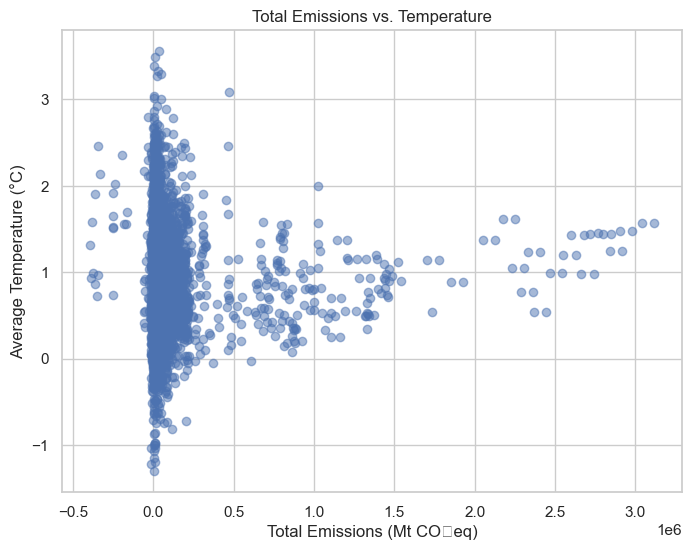

In [109]:
# 3. Compare emissions vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(df["total_emission"], df["Average Temperature °C"], alpha=0.5)
plt.title("Total Emissions vs. Temperature")
plt.xlabel("Total Emissions (Mt CO₂eq)")
plt.ylabel("Average Temperature (°C)")
plt.show()

- Higher emissions generally correspond to higher temperatures.
- The data points are scattered, showing that other factors also influence temperature.
- Despite variability, there’s a visible positive relationship between emissions and warming.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


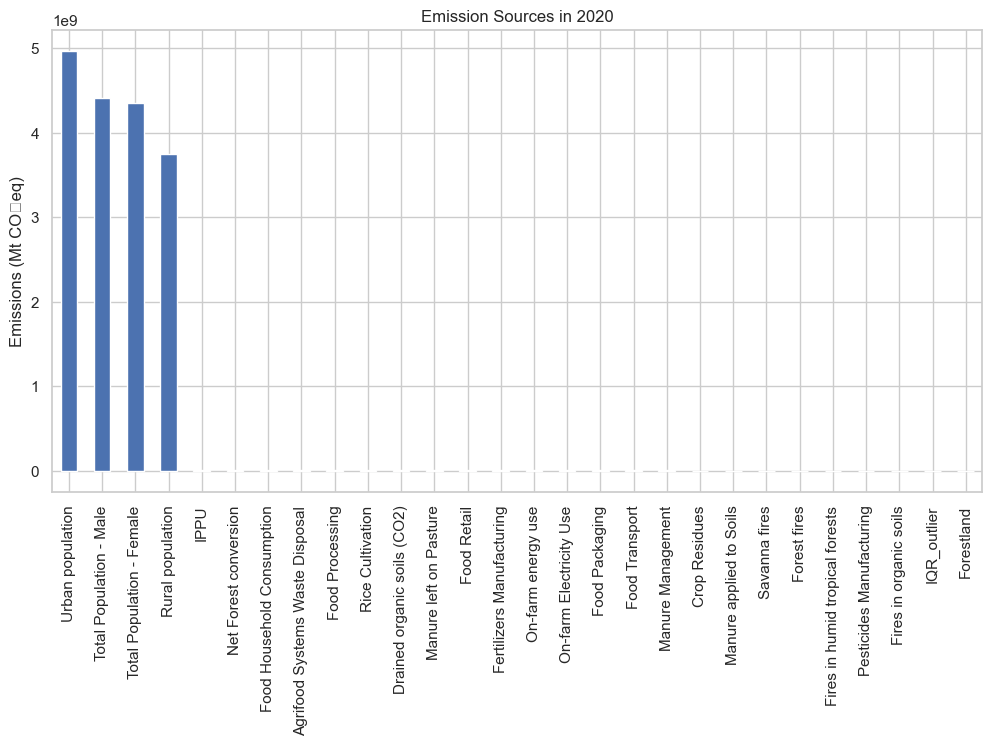

In [111]:
# 4. Top emission sources (latest year)
latest_year = df["Year"].max()
latest = df[df["Year"] == latest_year]
emission_sources = latest.drop(columns=["Area","Year","total_emission","Average Temperature °C"]).sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
emission_sources.plot(kind='bar')
plt.title(f"Emission Sources in {latest_year}")
plt.ylabel("Emissions (Mt CO₂eq)")
plt.show()

- This chart shows the main sources of emissions in 2020. 
- Urban population had the highest emissions, followed by total male and female populations, and rural population. 
- All other listed sources contributed far less compared to population-related categories.

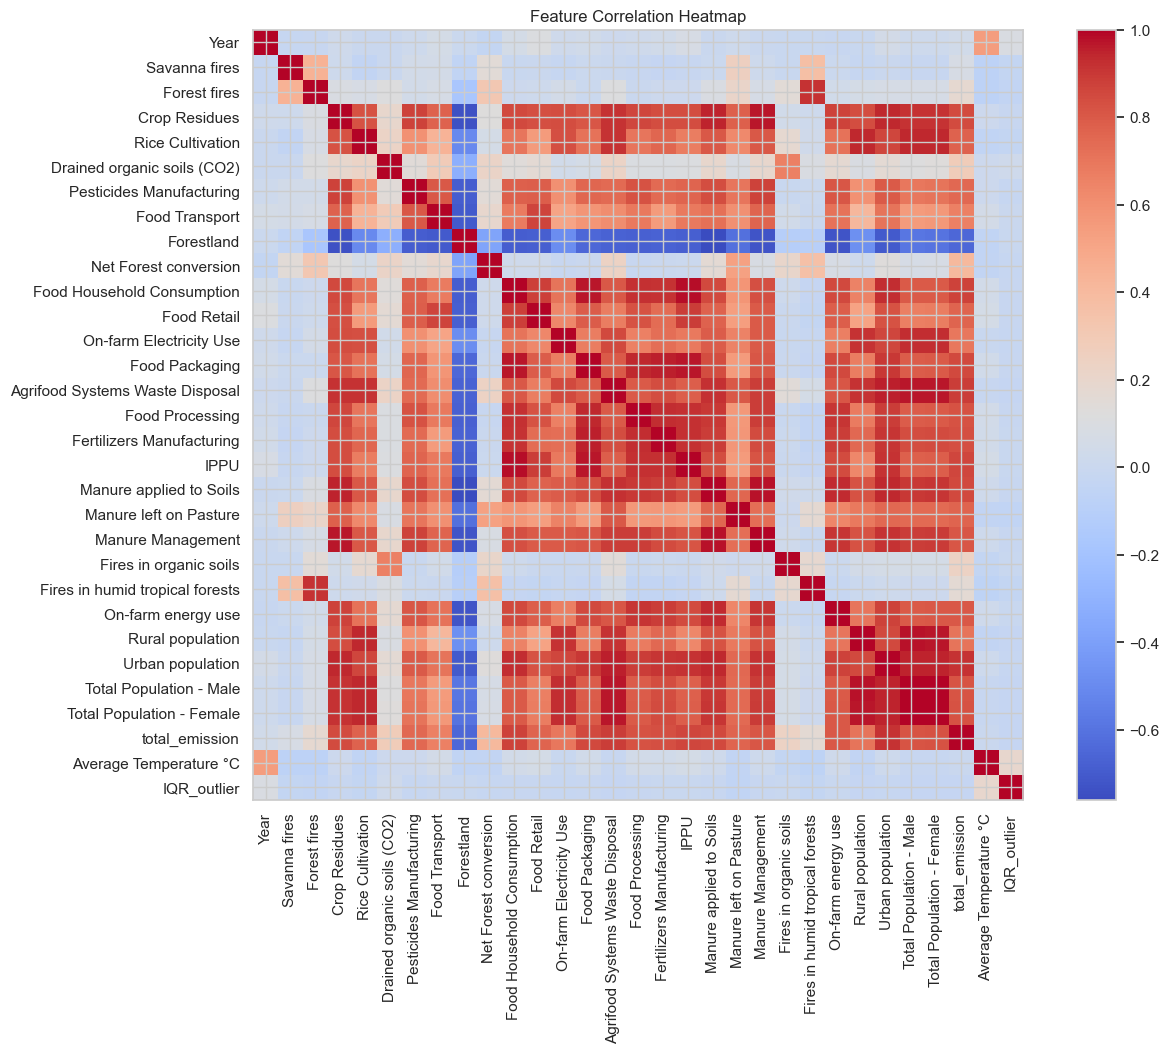

In [113]:
# 5. Correlation heatmap between emissions and temperature
plt.figure(figsize=(14,10))
corr = df.drop(columns=["Area"]).corr()
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Feature Correlation Heatmap")
plt.show()

- This heatmap shows how different features are related to each other. 
- Dark red means a strong positive relationship, while dark blue means a strong negative relationship. 
- Most features are positively related, but “Forestland” and “Net Forest conversion” have strong negative relationships with many others.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


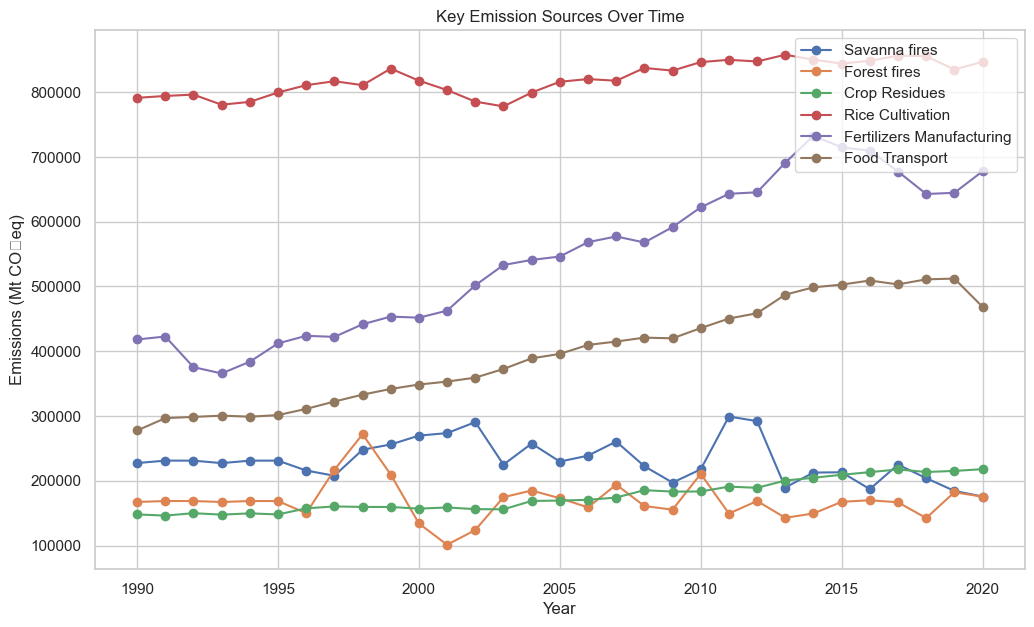

In [115]:
# 6. Emission source trends over time
key_sources = ["Savanna fires","Forest fires","Crop Residues","Rice Cultivation",
               "Fertilizers Manufacturing","Food Transport"]
df_grouped = df.groupby("Year")[key_sources].sum()
df_grouped.plot(figsize=(12,7), marker='o')
plt.title("Key Emission Sources Over Time")
plt.xlabel("Year")
plt.ylabel("Emissions (Mt CO₂eq)")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

- This graph shows how emissions from different sources have changed from 1990 to 2020.
- Rice cultivation and fertilizer manufacturing are the biggest contributors to emissions.
- Emissions from food transport are also rising steadily over time.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


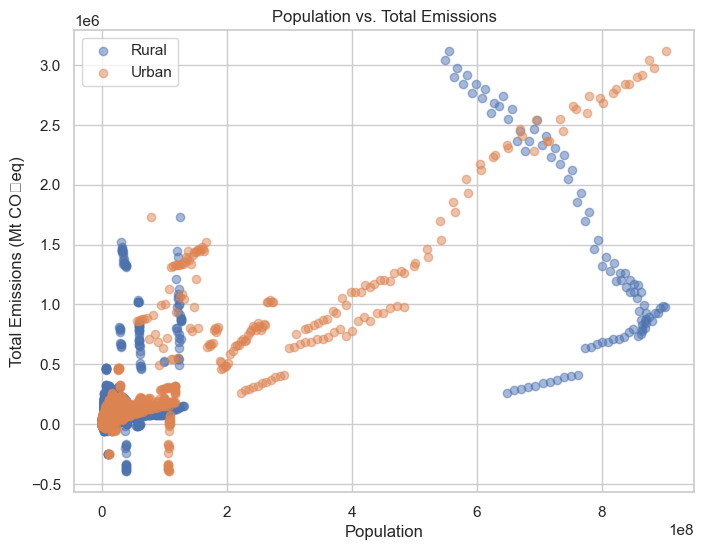

In [117]:
# 7. Population vs. Emissions
plt.figure(figsize=(8,6))
plt.scatter(df["Rural population"], df["total_emission"], alpha=0.5, label='Rural')
plt.scatter(df["Urban population"], df["total_emission"], alpha=0.5, label='Urban')
plt.title("Population vs. Total Emissions")
plt.xlabel("Population")
plt.ylabel("Total Emissions (Mt CO₂eq)")
plt.legend()
plt.show()

- This graph compares emissions with rural and urban population sizes.
- As urban population increases, emissions also rise.
- Rural areas show mixed results, with emissions going down at higher populations.

<Figure size 1400x600 with 0 Axes>

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


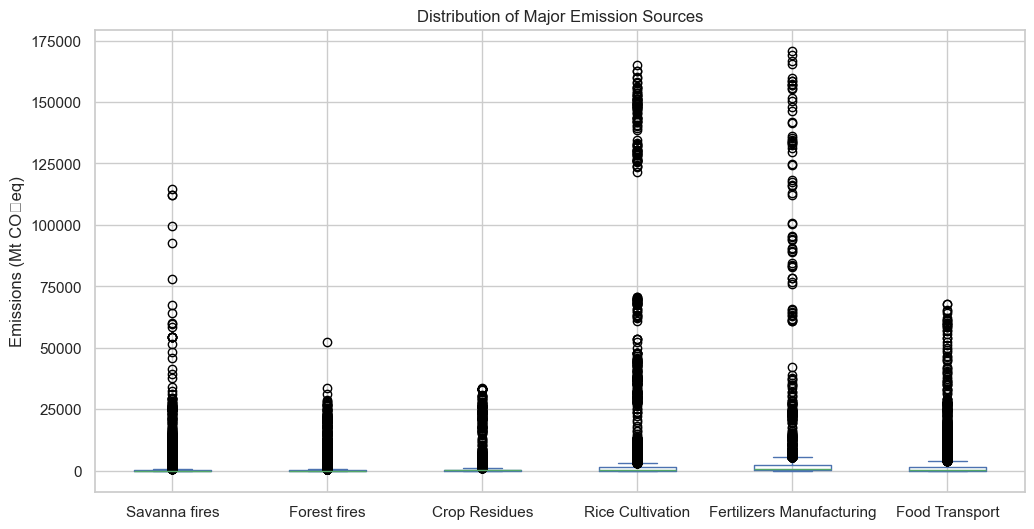

In [119]:
# 8. Boxplot of major emission categories
plt.figure(figsize=(14,6))
df[key_sources].plot(kind='box', figsize=(12,6))
plt.title("Distribution of Major Emission Sources")
plt.ylabel("Emissions (Mt CO₂eq)")
plt.show()

- This graph shows how emissions are spread across different sources.
- Rice cultivation and fertilizer manufacturing have the highest emissions overall.
- Other sources like forest fires and crop residues have much smaller contributions.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


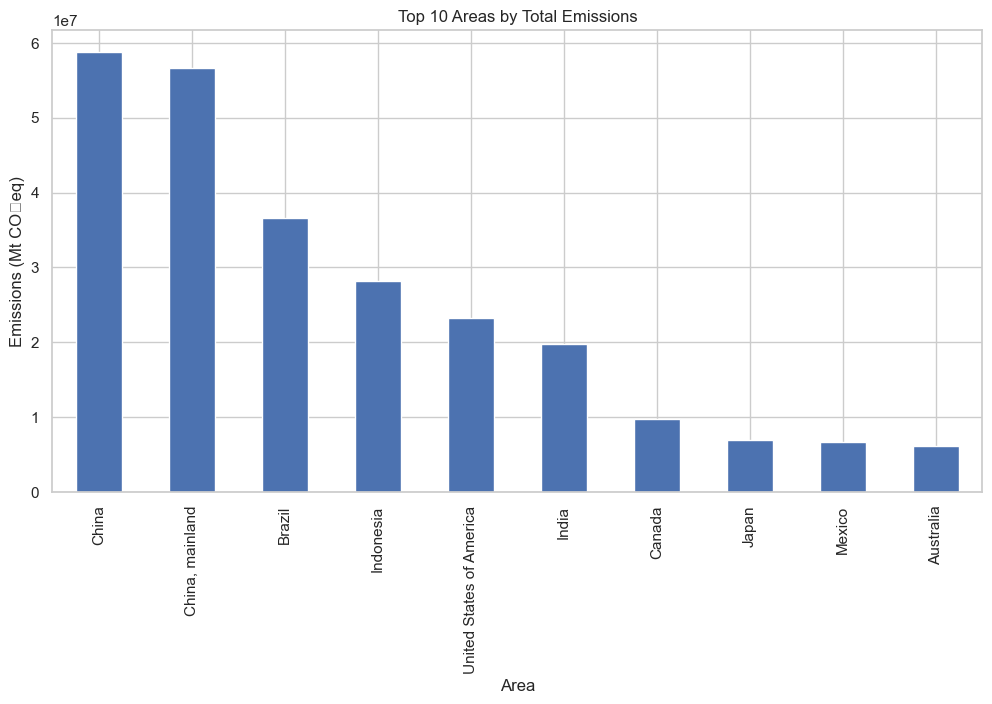

In [121]:
# 9. Top emitting areas
top_areas = df.groupby("Area")["total_emission"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_areas.plot(kind='bar')
plt.title("Top 10 Areas by Total Emissions")
plt.ylabel("Emissions (Mt CO₂eq)")
plt.show()

- This bar chart shows the top 10 areas with the highest total emissions.
- China and mainland China lead by a large margin, followed by Brazil, Indonesia, and the USA.
- Other countries like India, Canada, Japan, Mexico, and Australia contribute less but are still significant emitters.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


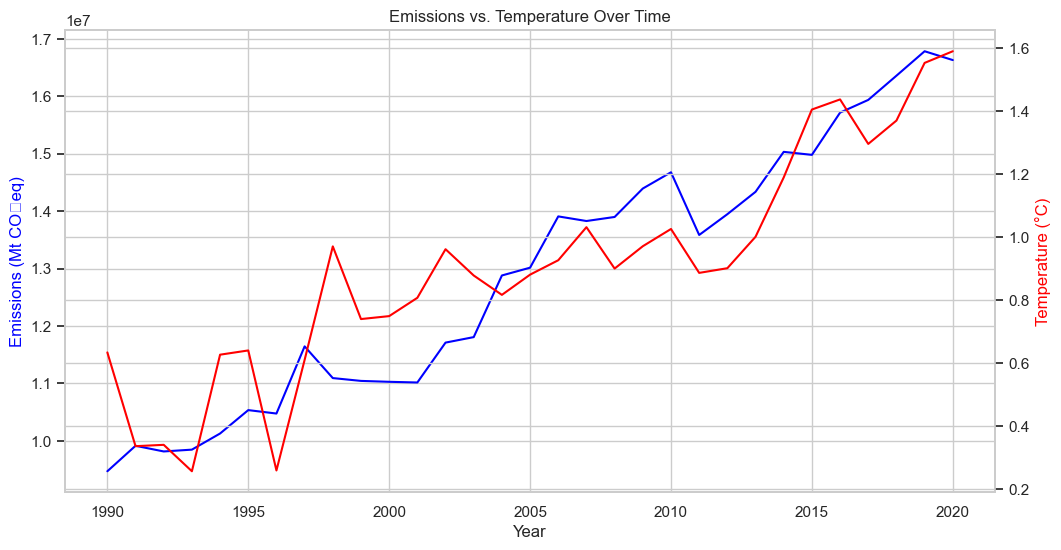

In [123]:
# 10. Yearly emissions vs. temperature (dual axis)
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.plot(df.groupby("Year")["total_emission"].sum(), color='blue', label="Emissions")
ax2.plot(df.groupby("Year")["Average Temperature °C"].mean(), color='red', label="Temperature")
ax1.set_xlabel("Year")
ax1.set_ylabel("Emissions (Mt CO₂eq)", color='blue')
ax2.set_ylabel("Temperature (°C)", color='red')
plt.title("Emissions vs. Temperature Over Time")
plt.show()

- This line chart compares emissions (blue) with average temperature (red) from 1990 to 2020.
- Both emissions and temperatures show an overall increasing trend, especially after the year 2000.
- This suggests a possible link between rising emissions and global temperature increases.

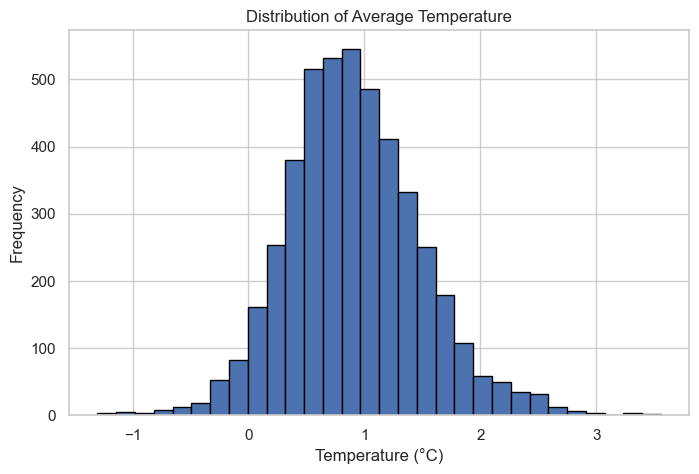

In [125]:
# 11. Histogram of temperature
plt.figure(figsize=(8,5))
plt.hist(df["Average Temperature °C"], bins=30, edgecolor='black')
plt.title("Distribution of Average Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


- This histogram shows how average temperature values are distributed.
- Most temperatures fall between 0°C and 2°C, with the peak around 1°C.
- Extreme low and high temperatures are rare, forming a bell-shaped distribution.

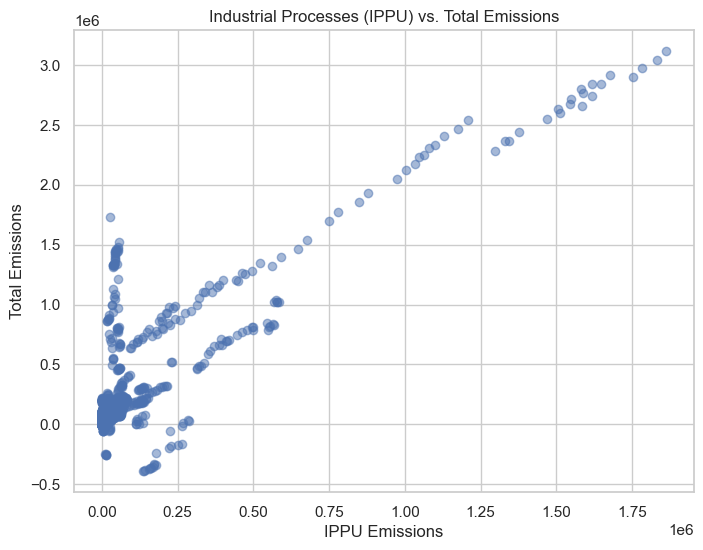

In [127]:
# 12. IPPU(Emissions from industrial processes and product use) vs. total emissions
plt.figure(figsize=(8,6))
plt.scatter(df["IPPU"], df["total_emission"], alpha=0.5)
plt.title("Industrial Processes (IPPU) vs. Total Emissions")
plt.xlabel("IPPU Emissions")
plt.ylabel("Total Emissions")
plt.show()

- As IPPU emissions increase, total emissions also rise, showing a strong positive relationship.
- Most data points cluster near lower IPPU emissions, but some extend far higher.
- A few points deviate slightly, but the general upward trend is clear.

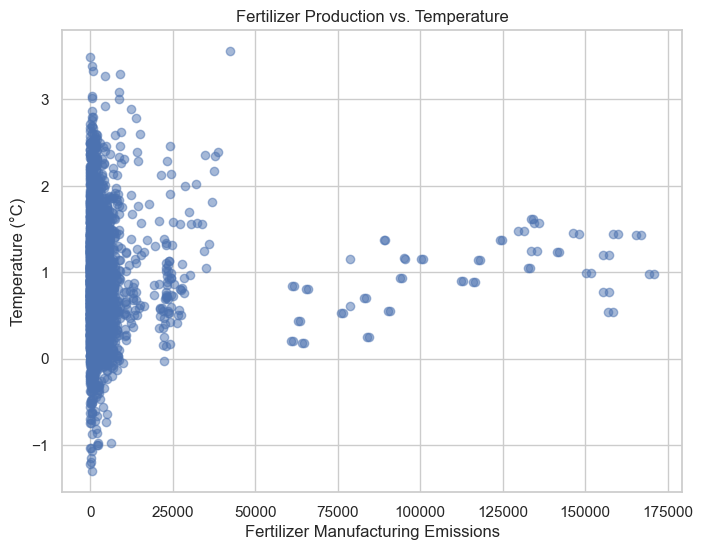

In [129]:
# 13. Fertilizer vs. Temperature
plt.figure(figsize=(8,6))
plt.scatter(df["Fertilizers Manufacturing"], df["Average Temperature °C"], alpha=0.5)
plt.title("Fertilizer Production vs. Temperature")
plt.xlabel("Fertilizer Manufacturing Emissions")
plt.ylabel("Temperature (°C)")
plt.show()

- Most emissions values are low, clustered near zero on the x-axis.
- Temperature does not show a clear pattern with fertilizer emissions.
- A few high-emission points exist, but they don't strongly affect temperature.

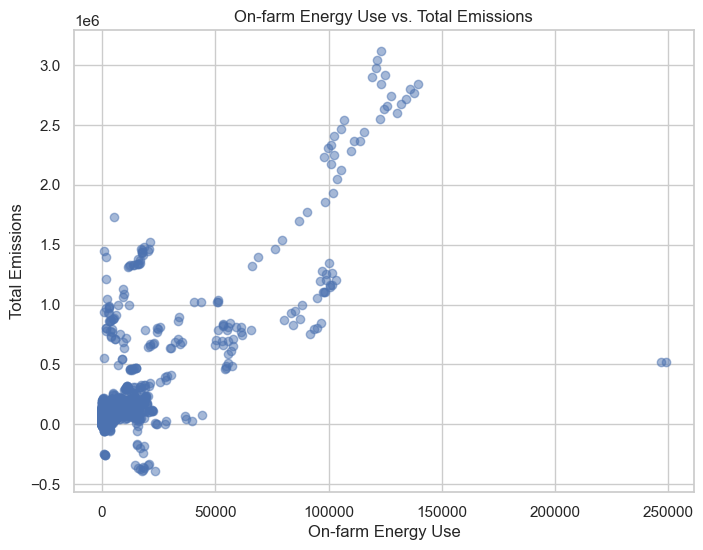

In [131]:
# 14. On-farm energy vs. emissions
plt.figure(figsize=(8,6))
plt.scatter(df["On-farm energy use"], df["total_emission"], alpha=0.5)
plt.title("On-farm Energy Use vs. Total Emissions")
plt.xlabel("On-farm Energy Use")
plt.ylabel("Total Emissions")
plt.show()

- Total emissions increase as on-farm energy use rises, showing a positive link.
- Many points are concentrated at low energy use levels, with fewer at high levels.
- The overall trend suggests farms using more energy contribute more to emissions.

<Figure size 1000x600 with 0 Axes>

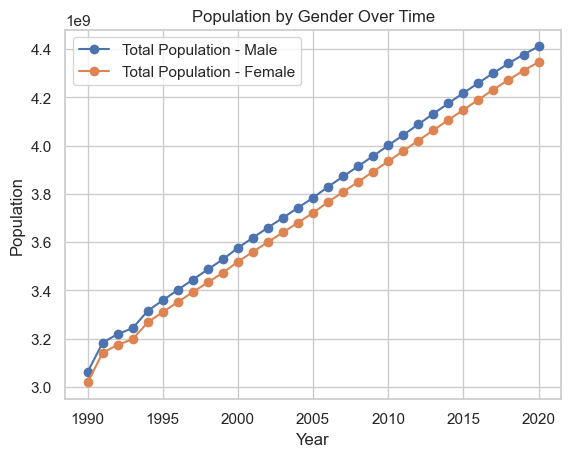

In [133]:
# 15. Population structure
plt.figure(figsize=(10,6))
df.groupby("Year")[["Total Population - Male","Total Population - Female"]].sum().plot(marker='o')
plt.title("Population by Gender Over Time")
plt.ylabel("Population")
plt.xlabel("Year")
plt.show()

- Both men and women increased: The total population for both males and females grew steadily from 1990 to 2020.
- Men slightly outnumbered women: Throughout this entire period, the male population (top line) was consistently higher than the female population (bottom line).
- Growth was stable: The population for both genders increased gradually over the 30 years shown, without any sudden large drops or spikes.